<a href="https://colab.research.google.com/github/divyarapelli/AIRBNB1/blob/main/AIRBNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid", palette="muted", font_scale=1.1)



In [4]:
# Replace with your file path if not using Colab upload
df = pd.read_excel("/content/1730285881-Airbnb_Open_Data.xlsx")
print("Dataset shape:", df.shape)
display(df.head())

Dataset shape: (102599, 26)


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,0.0,strict,Private room,2020.0,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,0.0,moderate,Entire home/apt,2007.0,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,1.0,flexible,Private room,2005.0,620.0,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,1.0,moderate,Entire home/apt,2005.0,368.0,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,0.0,moderate,Entire home/apt,2009.0,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [6]:
# 3. Basic Info & Missing Values
# -----------------------------------
df.info()
df.describe(include="all").T

missing = df.isnull().sum().sort_values(ascending=False)
print("Missing values:")
display(missing[missing > 0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

,0
license,102597
house_rules,54843
last review,15893
reviews per month,15879
country,532
availability 365,448
minimum nights,409
host name,408
review rate number,326
calculated host listings count,319


In [8]:

df = df.drop_duplicates()

# Remove negative or unrealistic values
df = df[df["price"] > 0]
df = df[df["minimum nights"] > 0]
df = df[df["availability 365"] >= 0]

df["price"] = df["price"].clip(upper=2000)

print("Cleaned dataset shape:", df.shape)

Cleaned dataset shape: (100548, 26)


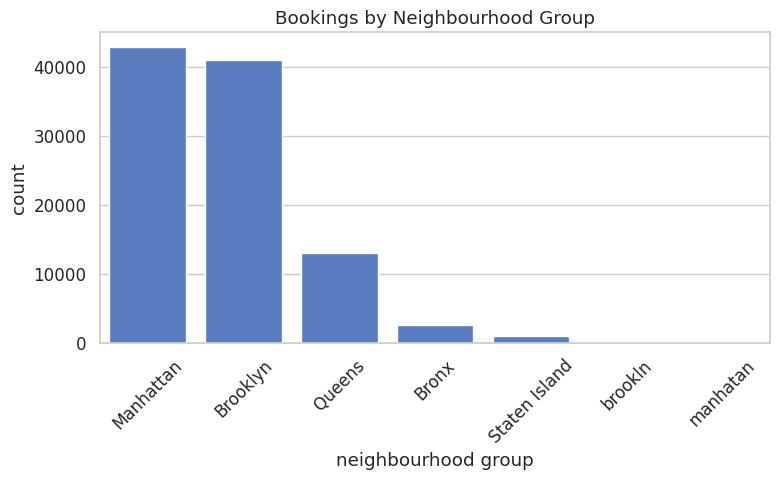

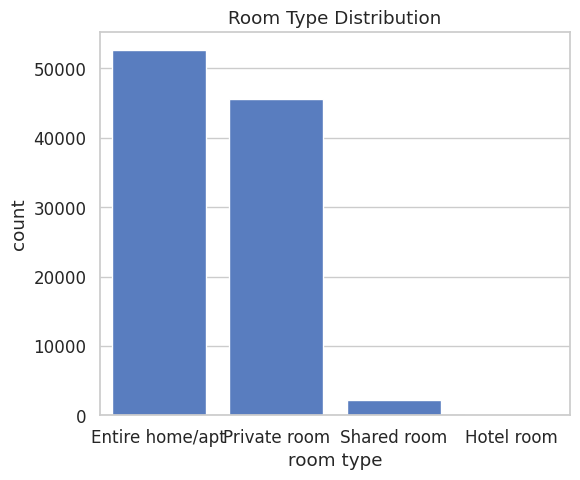

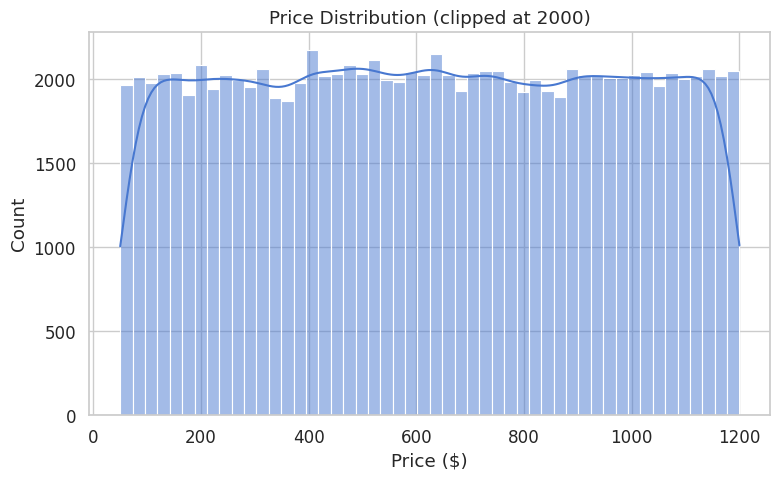

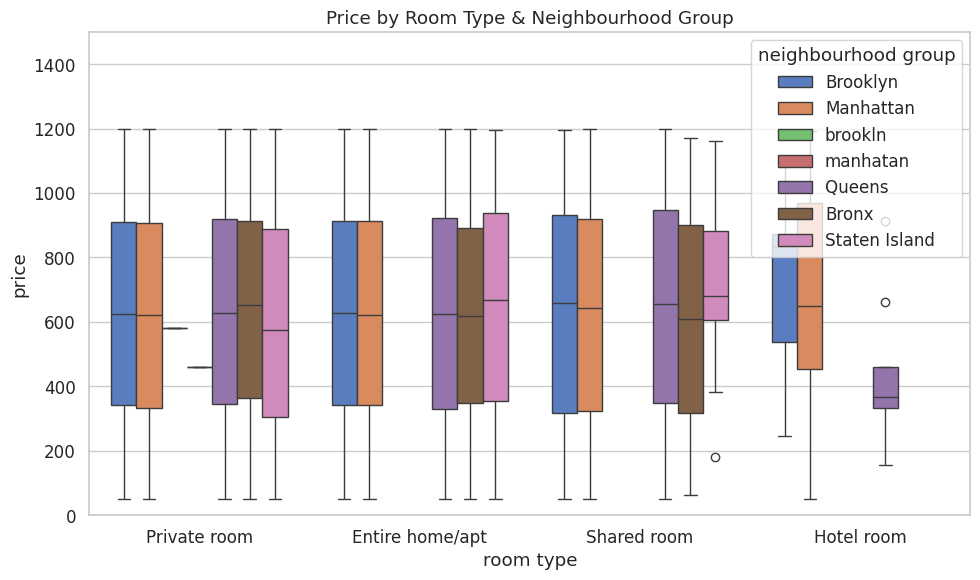

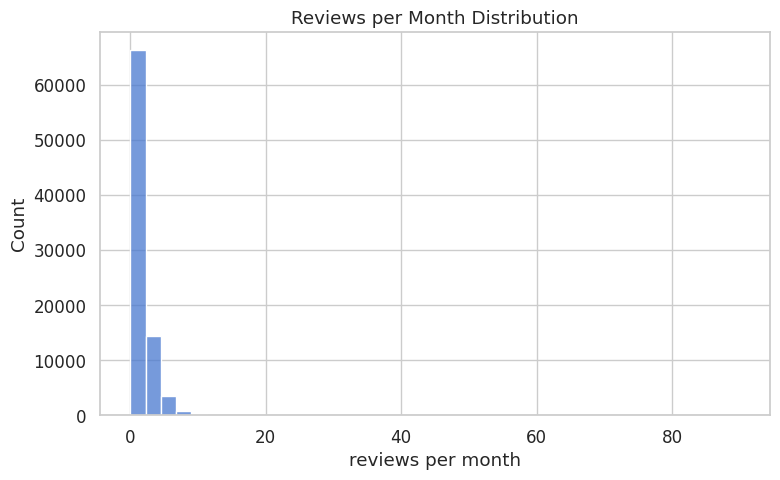

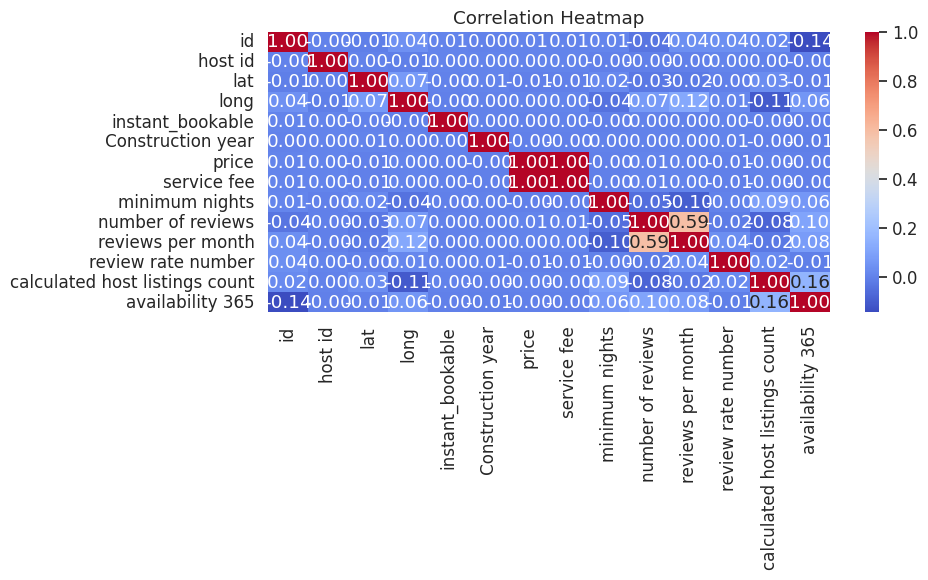

In [10]:
# 5. Exploratory Data Analysis (EDA)
# -----------------------------------

# (a) Booking patterns by neighbourhood group
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="neighbourhood group", order=df["neighbourhood group"].value_counts().index)
plt.title("Bookings by Neighbourhood Group")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# (b) Room type distribution
plt.figure(figsize=(6,5))
sns.countplot(data=df, x="room type", order=df["room type"].value_counts().index)
plt.title("Room Type Distribution")
plt.tight_layout()
plt.show()

# (c) Price distribution
plt.figure(figsize=(8,5))
sns.histplot(df["price"], bins=50, kde=True)
plt.title("Price Distribution (clipped at 2000)")
plt.xlabel("Price ($)")
plt.tight_layout()
plt.show()

# (d) Average price by room type and neighbourhood group
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="room type", y="price", hue="neighbourhood group")
plt.title("Price by Room Type & Neighbourhood Group")
plt.ylim(0, 1500)
plt.tight_layout()
plt.show()

# (e) Reviews per month distribution
plt.figure(figsize=(8,5))
sns.histplot(df["reviews per month"].dropna(), bins=40, kde=False)
plt.title("Reviews per Month Distribution")
plt.tight_layout()
plt.show()

# (f) Correlation heatmap for numeric features
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


In [12]:
# 6. Insights
# -----------------------------------
print("Top 5 neighbourhoods by number of listings:")
print(df["neighbourhood"].value_counts().head())

print("\nAverage price by room type:")
print(df.groupby("room type")["price"].mean())

print("\nAverage reviews per month by neighbourhood group:")
print(df.groupby("neighbourhood group")["reviews per month"].mean())


Top 5 neighbourhoods by number of listings:
neighbourhood
Bedford-Stuyvesant    7802
Williamsburg          7617
Harlem                5354
Bushwick              4887
Hell's Kitchen        3894
Name: count, dtype: int64

Average price by room type:
room type
Entire home/apt    625.404427
Hotel room         668.424779
Private room       625.181499
Shared room        633.204232
Name: price, dtype: float64

Average reviews per month by neighbourhood group:
neighbourhood group
Bronx            1.746882
Brooklyn         1.310791
Manhattan        1.264908
Queens           1.829228
Staten Island    1.730312
brookln          1.340000
manhatan         2.120000
Name: reviews per month, dtype: float64


In [14]:
# 7. (Optional) Predictive Model - Price Prediction
# -----------------------------------
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Select features & target
features = ["room type", "neighbourhood group", "minimum nights", "number of reviews", "reviews per month", "availability 365"]
target = "price"

df_model = df.dropna(subset=features + [target])
X = df_model[features]
y = df_model[target]

# Categorical & numeric columns
cat_cols = ["room type", "neighbourhood group"]
num_cols = ["minimum nights", "number of reviews", "reviews per month", "availability 365"]

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)

# Model pipeline
pipe = Pipeline(steps=[("pre", preprocessor), ("model", LinearRegression())])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
pipe.fit(X_train, y_train)

# Predictions
y_pred = pipe.predict(X_test)
print("\nModel Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Model Performance:
MAE: 286.18349990207815
R² Score: -0.0006401929978148146
